In [1]:
# Importing Libraries
import numpy as np
import  pandas as pd
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn.metrics import classification_report
from plot_keras_history import plot_history
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data=pd.read_csv('DATA.csv')

In [3]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data['label']=data['label'].replace(2,1)

In [5]:
X=data['combined_result']
y=data['label']
time_series=data['t_dist']

In [6]:
# Extracting sequences from the dataset
sequences=[]
labels=[]
temp=[]
    
for index,value in y.items():
    if value==1:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==0:
            sequences.append(temp)
            labels.append(1)
            temp=[]
    if value==0:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==1:
            sequences.append(temp)
            labels.append(0)
            temp=[]

In [7]:
# Not a sequence but label is 1 
zero_seq_label_one=[]
for position, sublist in enumerate(sequences):
    if all(element == 0 for element in sublist):
        if labels[position]==1:
            zero_seq_label_one.append(position)

In [8]:
# Replacing those with 0
for value in zero_seq_label_one:
    labels[value]=0

In [9]:
# Is a sequence but label 0
seq_label_zero=[]
for position, sublist in enumerate(sequences):
    if any(element != 0 for element in sublist):
        if labels[position]==0:
            seq_label_zero.append(position)

In [10]:
# Replacing those with 1
for value in seq_label_zero:
    labels[value]=1

In [11]:
print(len(seq_label_zero))

127


In [12]:
# Checking the Number of events
zero=0
one=0
for value in labels:
    if value==0:
        zero+=1
    if value==1:
        one+=1
print(zero)
print(one)

655
794


In [13]:
# Train test splitt
X_train,X_test,y_train,y_test=train_test_split(sequences,labels,test_size=0.2,random_state=42)

In [14]:
print(X_test[78])

[0.004, 0.002, 0.0, 0.0, 0.0, 0.0, 0.011, 0.002, 0.003, 0.012, 0.012, 0.009, 0.003, 0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [15]:
# Padding and reshaping
X_train=pad_sequences(X_train,padding='post',truncating='post',dtype=float,maxlen=50)
X_test=pad_sequences(X_test,padding='post',truncating='post',dtype=float,maxlen=50)

In [16]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [17]:
y_train.shape

(1159, 1)

In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(1159, 50, 1)

In [19]:
# It is because Our each  sequence has max laength of 50 and in output we want to predict a label
Tx=50
Ty=1
repeator = tf.keras.layers.RepeatVector(Tx)
concatenator = tf.keras.layers.Concatenate(axis=-1)
densor1 =tf.keras.layers. Dense(10, activation = "tanh")
densor2 = tf.keras.layers.Dense(1, activation = "relu")
activator = tf.keras.layers.Activation('softmax', name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor =tf.keras.layers. Dot(axes = 1)

In [20]:
def one_step_attention(a,s_prev):
    # We done this to change s_prev to shape of(m,Tx,n_s) for cocatination with a, because concatenation requires all dimension same accept concat axis in this 
    # case is last one so a and s_prev have same first two dims (m,Tx) but last one is changed
    s_prev=repeator(s_prev)
    # We will here concatenate a and s_prev
    concat=concatenator([a,s_prev])
    # here i will calculate energies with 2 dense layers
    e=densor1(concat)
    energies=densor2(e)
    # we know alpha is softmax of this energy
    alpha=activator(energies)
    # to calculate context vector we take dot product of alpha and a
    context_vector=dotor([alpha,a])
    return context_vector

In [21]:
n_a = 32 # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64 # number of units for the post-attention LSTM's hidden state "s"

# Please note, this is the post attention LSTM cell.
post_activation_LSTM_cell = tf.keras.layers.LSTM(n_s, return_state = True) # Please do not modify this global variable.
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [22]:
def modelf(Tx,Ty,n_a, n_s):
    X=tf.keras.layers.Input(shape=(X_train.shape[1],1)) # because embedding layer only demands the sequence length if i give full shape like (m,Tx) the
    # ouput of embedding layer will be 4D which can not be fed into BILSTM
    # hidden state for post LSTM
    s0 = tf.keras.layers.Input(shape=(n_s,), name='s0')
    # cell state for post lstm
    # because we know From CampusX that shape of hidden and cell state of lstm are equal
    c0 = tf.keras.layers.Input(shape=(n_s,), name='c0')
    s=s0
    c=c0
    outputs = []
    
    a = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_a,return_sequences=True),input_shape=(X_train.shape[1],1))(X)

    for t in range(Ty):
        context=one_step_attention(a,s)
        _,s,c=post_activation_LSTM_cell(context,initial_state = [s,c] )
        out = output_layer(s)
        outputs.append(out)


        
    print(outputs)
    model=tf.keras.models.Model(inputs=[X,s0,c0],outputs=outputs)

    return model

In [23]:
model = modelf(Tx, Ty, n_a, n_s)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>]


In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001,beta_1=0.9,beta_2=0.999)#0.00001
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = opt, metrics = ['accuracy'])

In [25]:
# For Training Set
m=X_train.shape[0]
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))

In [26]:
# For test set
m_test=X_test.shape[0]
s0_test = np.zeros((m_test, n_s))
c0_test = np.zeros((m_test, n_s))

In [27]:
# model_history=model.fit([X_train, s0, c0], y_train, epochs=500, batch_size=100,validation_data=([X_test, s0_test, c0_test],y_test))#350

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

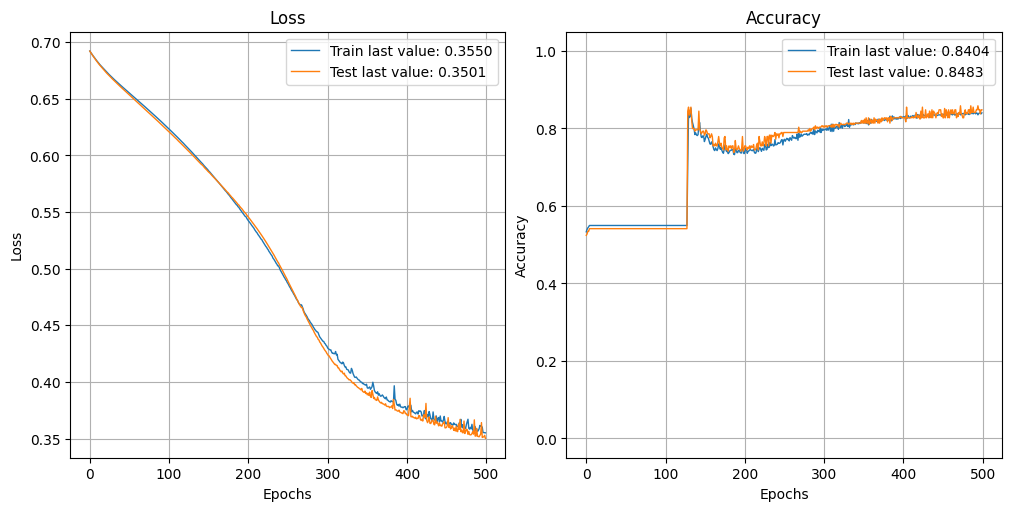

In [50]:
plot_history(model_history,show_standard_deviation=False,show_average=True)

In [28]:
#model.save_weights('Sequence-model-with-attention.h5')
model.load_weights('Sequence-model-with-attention.h5')

In [29]:
# Predicted on Test Set
pred=model.predict([X_test, s0_test, c0_test])
pred=np.round(pred)

10/10 [==============================] - 4s 16ms/step


In [50]:
# Get the confusion matrix
cm = confusion_matrix(y_test, pred)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}
classes=[0,1]
# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))

    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]

    # The accuracy for the current class is the ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [51]:
print(per_class_accuracies)

{0: 0.9586206896551724, 1: 0.9586206896551724}


In [52]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       133
           1       1.00      0.92      0.96       157

    accuracy                           0.96       290
   macro avg       0.96      0.96      0.96       290
weighted avg       0.96      0.96      0.96       290


**Starting From here to make Predictions on Real Data 96-Hours Data**

In [30]:
real_data=pd.read_csv('new_96hrs_new_final_processed_data.csv')
real_data.head(5)

,Unnamed: 0,time,gsm,S1,S2,S3,dS1,dS2,dS3
0,0,2022-01-21 09:30:00.000000,5.075708e-07,-0.106049,-0.978210,0.182831,-0.000519,0.000000,-0.000488
1,1,2022-01-21 09:30:00.000000,1.252629e-06,-0.106567,-0.978210,0.182343,0.000000,0.000488,0.001007
2,2,2022-01-21 09:30:00.000000,1.222827e-06,-0.106567,-0.977722,0.183350,0.000519,0.000000,0.000977
3,3,2022-01-21 09:30:00.000000,3.488734e-06,-0.106049,-0.977722,0.184326,-0.001007,-0.000488,-0.001495
4,4,2022-01-21 09:30:00.000000,2.474524e-06,-0.107056,-0.978210,0.182831,-0.001495,0.000488,0.000000


In [31]:
scaler = MinMaxScaler(feature_range=(0.0, 10.789))
real_data['gsm']=scaler.fit_transform(real_data[['gsm']])
graph_data=real_data['gsm']
time_series=real_data['time']

In [32]:
graph_data.shape

(1915618,)

In [33]:
# extracting features
real_sequence=[]
temp=[]
events=[]
time=[]
time_temp=[]
for index,value in graph_data.items():
    if value!=0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]==0.0:
            real_sequence.append(temp)
            events.append(1)
            time_temp.append(time_series[(index+1)-len(temp)])
            time_temp.append(time_series[index])
            time.append(time_temp)
            time_temp=[]
            temp=[]
    if value==0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]!=0.0:
            real_sequence.append(temp)
            events.append(0)
            temp=[]

In [34]:
time[0]

['2022-01-21 09:30:00.000000', '2022-01-21 09:30:00.000000']

In [35]:
# Padding and reshapping
seq_for_predictions=pad_sequences(real_sequence,padding='post',truncating='post',dtype=float,maxlen=50)
same_seq_for_plotting=pad_sequences(real_sequence,padding='post',truncating='post',dtype=float,maxlen=50)

In [36]:
# Reshaping
seq_for_predictions=seq_for_predictions.reshape(seq_for_predictions.shape[0], seq_for_predictions.shape[1], 1)

In [37]:
# For Real Data set
m_real=seq_for_predictions.shape[0]
s0_real = np.zeros((m_real, n_s))
c0_real = np.zeros((m_real, n_s))

In [38]:
predictions=model.predict([seq_for_predictions, s0_real, c0_real])
predictions=np.round(predictions)

5075/5075 [==============================] - 81s 16ms/step


In [39]:
print(predictions[106])
print(same_seq_for_plotting[106])

[1.]
[0.00646152 0.00316281 0.00105427 0.00316281 0.00316281 0.00975611
 0.00119017 0.00224444 0.00329871 0.0045383  0.00638327 0.00210854
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [40]:
for index,value in enumerate(same_seq_for_plotting):
    if (any(element != 0 for element in value) and predictions[index]==1) or (all(element == 0 for element in value) and predictions[index]==0 ):
        continue
    else:
        print('Got wrong label',index)

Got wrong label 8
Got wrong label 70
Got wrong label 114
Got wrong label 120
Got wrong label 126
Got wrong label 174
Got wrong label 232
Got wrong label 290
Got wrong label 324
Got wrong label 330
Got wrong label 332
Got wrong label 358
Got wrong label 406
Got wrong label 428
Got wrong label 446
Got wrong label 462
Got wrong label 516
Got wrong label 606
Got wrong label 764
Got wrong label 796
Got wrong label 806
Got wrong label 954
Got wrong label 974
Got wrong label 1060
Got wrong label 1062
Got wrong label 1134
Got wrong label 1190
Got wrong label 1272
Got wrong label 1354
Got wrong label 1358
Got wrong label 1370
Got wrong label 1380
Got wrong label 1484
Got wrong label 1526
Got wrong label 1534
Got wrong label 1544
Got wrong label 1568
Got wrong label 1570
Got wrong label 1612
Got wrong label 1794
Got wrong label 1798
Got wrong label 1812
Got wrong label 1840
Got wrong label 1842
Got wrong label 1928
Got wrong label 1930
Got wrong label 1948
Got wrong label 1974
Got wrong label 19

Got wrong label 17676
Got wrong label 17686
Got wrong label 17692
Got wrong label 17710
Got wrong label 17730
Got wrong label 17750
Got wrong label 17754
Got wrong label 17832
Got wrong label 17886
Got wrong label 18066
Got wrong label 18068
Got wrong label 18072
Got wrong label 18172
Got wrong label 18190
Got wrong label 18192
Got wrong label 18202
Got wrong label 18212
Got wrong label 18250
Got wrong label 18394
Got wrong label 18442
Got wrong label 18462
Got wrong label 18482
Got wrong label 18526
Got wrong label 18540
Got wrong label 18600
Got wrong label 18640
Got wrong label 18686
Got wrong label 18688
Got wrong label 18828
Got wrong label 18830
Got wrong label 18936
Got wrong label 18950
Got wrong label 18954
Got wrong label 18968
Got wrong label 18978
Got wrong label 18998
Got wrong label 19048
Got wrong label 19084
Got wrong label 19112
Got wrong label 19154
Got wrong label 19226
Got wrong label 19262
Got wrong label 19266
Got wrong label 19270
Got wrong label 19284
Got wrong 

Got wrong label 37540
Got wrong label 37558
Got wrong label 37570
Got wrong label 37586
Got wrong label 37590
Got wrong label 37624
Got wrong label 37632
Got wrong label 37636
Got wrong label 37644
Got wrong label 37660
Got wrong label 37726
Got wrong label 37736
Got wrong label 37774
Got wrong label 37804
Got wrong label 37838
Got wrong label 37856
Got wrong label 37866
Got wrong label 37868
Got wrong label 37878
Got wrong label 37880
Got wrong label 37892
Got wrong label 37912
Got wrong label 37932
Got wrong label 37942
Got wrong label 37964
Got wrong label 37980
Got wrong label 38036
Got wrong label 38054
Got wrong label 38056
Got wrong label 38078
Got wrong label 38104
Got wrong label 38148
Got wrong label 38282
Got wrong label 38350
Got wrong label 38360
Got wrong label 38374
Got wrong label 38406
Got wrong label 38462
Got wrong label 38466
Got wrong label 38492
Got wrong label 38518
Got wrong label 38558
Got wrong label 38572
Got wrong label 38664
Got wrong label 38816
Got wrong 

Got wrong label 54108
Got wrong label 54204
Got wrong label 54314
Got wrong label 54330
Got wrong label 54336
Got wrong label 54352
Got wrong label 54440
Got wrong label 54444
Got wrong label 54452
Got wrong label 54472
Got wrong label 54478
Got wrong label 54526
Got wrong label 54528
Got wrong label 54560
Got wrong label 54674
Got wrong label 54682
Got wrong label 54706
Got wrong label 54708
Got wrong label 54748
Got wrong label 54782
Got wrong label 54848
Got wrong label 54868
Got wrong label 54876
Got wrong label 54890
Got wrong label 54904
Got wrong label 54944
Got wrong label 54952
Got wrong label 54976
Got wrong label 55018
Got wrong label 55122
Got wrong label 55144
Got wrong label 55156
Got wrong label 55168
Got wrong label 55186
Got wrong label 55192
Got wrong label 55206
Got wrong label 55208
Got wrong label 55216
Got wrong label 55256
Got wrong label 55346
Got wrong label 55360
Got wrong label 55394
Got wrong label 55434
Got wrong label 55458
Got wrong label 55482
Got wrong 

Got wrong label 76270
Got wrong label 76282
Got wrong label 76294
Got wrong label 76368
Got wrong label 76374
Got wrong label 76414
Got wrong label 76472
Got wrong label 76490
Got wrong label 76508
Got wrong label 76534
Got wrong label 76536
Got wrong label 76550
Got wrong label 76558
Got wrong label 76582
Got wrong label 76768
Got wrong label 76780
Got wrong label 76798
Got wrong label 76960
Got wrong label 76968
Got wrong label 76970
Got wrong label 77104
Got wrong label 77196
Got wrong label 77202
Got wrong label 77304
Got wrong label 77312
Got wrong label 77406
Got wrong label 77444
Got wrong label 77506
Got wrong label 77550
Got wrong label 77560
Got wrong label 77572
Got wrong label 77596
Got wrong label 77616
Got wrong label 77644
Got wrong label 77764
Got wrong label 77830
Got wrong label 77832
Got wrong label 77856
Got wrong label 78034
Got wrong label 78046
Got wrong label 78064
Got wrong label 78074
Got wrong label 78106
Got wrong label 78122
Got wrong label 78144
Got wrong 

Got wrong label 93428
Got wrong label 93500
Got wrong label 93518
Got wrong label 93522
Got wrong label 93534
Got wrong label 93558
Got wrong label 93586
Got wrong label 93628
Got wrong label 93644
Got wrong label 93646
Got wrong label 93672
Got wrong label 93720
Got wrong label 93754
Got wrong label 93778
Got wrong label 93858
Got wrong label 93864
Got wrong label 93906
Got wrong label 93908
Got wrong label 93920
Got wrong label 94062
Got wrong label 94088
Got wrong label 94096
Got wrong label 94122
Got wrong label 94278
Got wrong label 94280
Got wrong label 94304
Got wrong label 94344
Got wrong label 94348
Got wrong label 94352
Got wrong label 94354
Got wrong label 94458
Got wrong label 94538
Got wrong label 94578
Got wrong label 94582
Got wrong label 94584
Got wrong label 94608
Got wrong label 94620
Got wrong label 94638
Got wrong label 94656
Got wrong label 94676
Got wrong label 94700
Got wrong label 94730
Got wrong label 94758
Got wrong label 94778
Got wrong label 94804
Got wrong 

Got wrong label 111282
Got wrong label 111310
Got wrong label 111372
Got wrong label 111380
Got wrong label 111390
Got wrong label 111402
Got wrong label 111416
Got wrong label 111440
Got wrong label 111468
Got wrong label 111538
Got wrong label 111588
Got wrong label 111594
Got wrong label 111642
Got wrong label 111646
Got wrong label 111682
Got wrong label 111734
Got wrong label 111774
Got wrong label 111826
Got wrong label 111886
Got wrong label 111888
Got wrong label 111950
Got wrong label 111976
Got wrong label 111992
Got wrong label 111996
Got wrong label 112010
Got wrong label 112020
Got wrong label 112176
Got wrong label 112200
Got wrong label 112278
Got wrong label 112318
Got wrong label 112328
Got wrong label 112332
Got wrong label 112366
Got wrong label 112496
Got wrong label 112552
Got wrong label 112558
Got wrong label 112610
Got wrong label 112680
Got wrong label 112770
Got wrong label 112774
Got wrong label 112788
Got wrong label 112806
Got wrong label 112902
Got wrong l

Got wrong label 124176
Got wrong label 124212
Got wrong label 124274
Got wrong label 124318
Got wrong label 124322
Got wrong label 124498
Got wrong label 124520
Got wrong label 124552
Got wrong label 124558
Got wrong label 124584
Got wrong label 124634
Got wrong label 124638
Got wrong label 124656
Got wrong label 124696
Got wrong label 124770
Got wrong label 124840
Got wrong label 124972
Got wrong label 124976
Got wrong label 125072
Got wrong label 125128
Got wrong label 125162
Got wrong label 125170
Got wrong label 125196
Got wrong label 125282
Got wrong label 125300
Got wrong label 125336
Got wrong label 125356
Got wrong label 125362
Got wrong label 125374
Got wrong label 125382
Got wrong label 125384
Got wrong label 125434
Got wrong label 125438
Got wrong label 125536
Got wrong label 125552
Got wrong label 125640
Got wrong label 125660
Got wrong label 125666
Got wrong label 125768
Got wrong label 125772
Got wrong label 125810
Got wrong label 125862
Got wrong label 125876
Got wrong l

Got wrong label 139696
Got wrong label 139708
Got wrong label 139712
Got wrong label 139726
Got wrong label 139794
Got wrong label 139806
Got wrong label 139896
Got wrong label 139904
Got wrong label 140014
Got wrong label 140038
Got wrong label 140074
Got wrong label 140102
Got wrong label 140124
Got wrong label 140128
Got wrong label 140136
Got wrong label 140196
Got wrong label 140206
Got wrong label 140220
Got wrong label 140242
Got wrong label 140274
Got wrong label 140282
Got wrong label 140412
Got wrong label 140444
Got wrong label 140502
Got wrong label 140520
Got wrong label 140554
Got wrong label 140556
Got wrong label 140660
Got wrong label 140716
Got wrong label 140788
Got wrong label 140862
Got wrong label 141010
Got wrong label 141040
Got wrong label 141112
Got wrong label 141124
Got wrong label 141142
Got wrong label 141168
Got wrong label 141198
Got wrong label 141208
Got wrong label 141242
Got wrong label 141250
Got wrong label 141252
Got wrong label 141272
Got wrong l

Got wrong label 156178
Got wrong label 156184
Got wrong label 156208
Got wrong label 156256
Got wrong label 156266
Got wrong label 156272
Got wrong label 156282
Got wrong label 156338
Got wrong label 156374
Got wrong label 156532
Got wrong label 156600
Got wrong label 156606
Got wrong label 156650
Got wrong label 156666
Got wrong label 156694
Got wrong label 156722
Got wrong label 156736
Got wrong label 156760
Got wrong label 156776
Got wrong label 156814
Got wrong label 156832
Got wrong label 156914
Got wrong label 156916
Got wrong label 156974
Got wrong label 157030
Got wrong label 157092
Got wrong label 157168
Got wrong label 157184
Got wrong label 157262
Got wrong label 157266
Got wrong label 157286
Got wrong label 157292
Got wrong label 157300
Got wrong label 157302
Got wrong label 157304
Got wrong label 157310
Got wrong label 157330
Got wrong label 157400
Got wrong label 157416
Got wrong label 157476
Got wrong label 157526
Got wrong label 157566
Got wrong label 157568
Got wrong l

In [41]:
dic={}
# The sequences having more non zero values will have greater mean than sequences having less non zero values
# so we have to select sequences with mean less than threshold
for index , value in enumerate(same_seq_for_plotting):
    if predictions[index]==1:
        dic[index]=np.mean(value)
    
    


In [41]:
print(dic)

{0: 0.0014111558285355929, 2: 0.0004018577766547106, 4: 0.0002500594814354789, 6: 0.0018040358438344184, 10: 0.0008819620972368603, 12: 0.00047524479838034035, 14: 0.004215347233328845, 16: 0.0016051248926925602, 18: 0.0037522100580614877, 20: 0.0011907476690094592, 22: 0.0006334675466799301, 24: 0.0010827674383895932, 26: 0.0026229065172308384, 28: 0.013544312024273536, 30: 0.02702528553035739, 32: 0.003925835020797321, 34: 0.005250919651012731, 36: 0.0006709435229820196, 38: 0.0005865196203234668, 40: 0.002681632607567959, 42: 0.0026864921297697674, 44: 0.0023357828834086776, 46: 0.004971044118101744, 48: 9.331929923135624e-05, 50: 0.0010247002663171256, 52: 9.331929923135624e-05, 54: 0.0004534181308637389, 56: 0.0011241145594965136, 58: 0.0007356822424840901, 60: 0.0038026173053073748, 62: 0.0011045117411231133, 64: 0.0012832433204100003, 66: 0.004757142776439049, 68: 0.001451349842679372, 72: 0.0001460327604035257, 74: 0.00031529238963603855, 76: 0.0005798480728938641, 78: 0.004208

In [42]:
# Changing Labels
for index , value in enumerate(same_seq_for_plotting):
    if np.mean(value)<0.00063:
        predictions[index]=0

In [43]:
print("Event Count After Post-Preprocessing:",np.count_nonzero(predictions==1))

Event Count After Post-Preprocessing: 56971


<IPython.core.display.Javascript object>


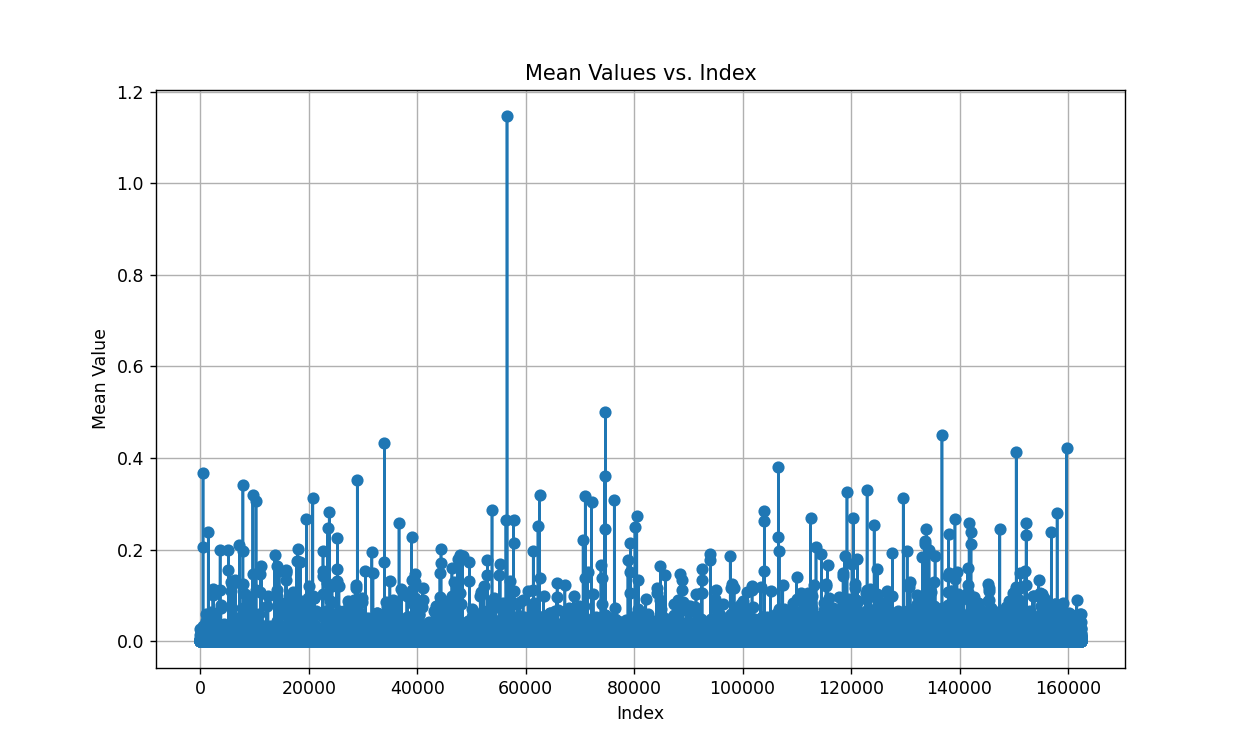

In [95]:
# This was to get Idea from Means of All events but unfortunatly did'nt get any idea 😭😭😭😭
indices = list(dic.keys())
means = list(dic.values())
plt.figure(figsize=(10,6))
plt.plot(indices, means, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.title('Mean Values vs. Index')

# Show the plot
plt.grid(True)
plt.show()


In [64]:
# Get the confusion matrix
cm = confusion_matrix(events, predictions)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}
classes=[0,1]
# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))

    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]

    # The accuracy for the current class is the ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [65]:
print(per_class_accuracies)

{0: 0.9734466408030051, 1: 0.9734466408030051}


In [44]:
# Converting Predictions into DataFrame
dfs = []

# Loop through each list and its corresponding label
for list1, label in zip(same_seq_for_plotting, predictions):#real_sequence
    # Repeat the label to match the length of the list
    label = np.repeat(label, len(list1))

    # Create a temporary DataFrame for the current list and label
    temp_df = pd.DataFrame({'Data': list1, 'Label': label})

    # Append the temporary DataFrame to the list
    dfs.append(temp_df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)


In [52]:
# Use This If you want to Apply a Mask
'''temp=[]
for index,value in df['Data'].items():
    if value<= 0.6:
        df.at[index, 'Label'] = 0.0'''

In [ ]:
# This Plotting With Markers On Signals
plt.figure(figsize=(10,6))
plt.plot(df['Data'],label='Actual-Signal',color='blue')
for index,value in df['Label'].items():
    if value==1:
        plt.plot(index,df['Data'][index],'ro')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [46]:
df['Data'].shape

(8119500,)

<IPython.core.display.Javascript object>


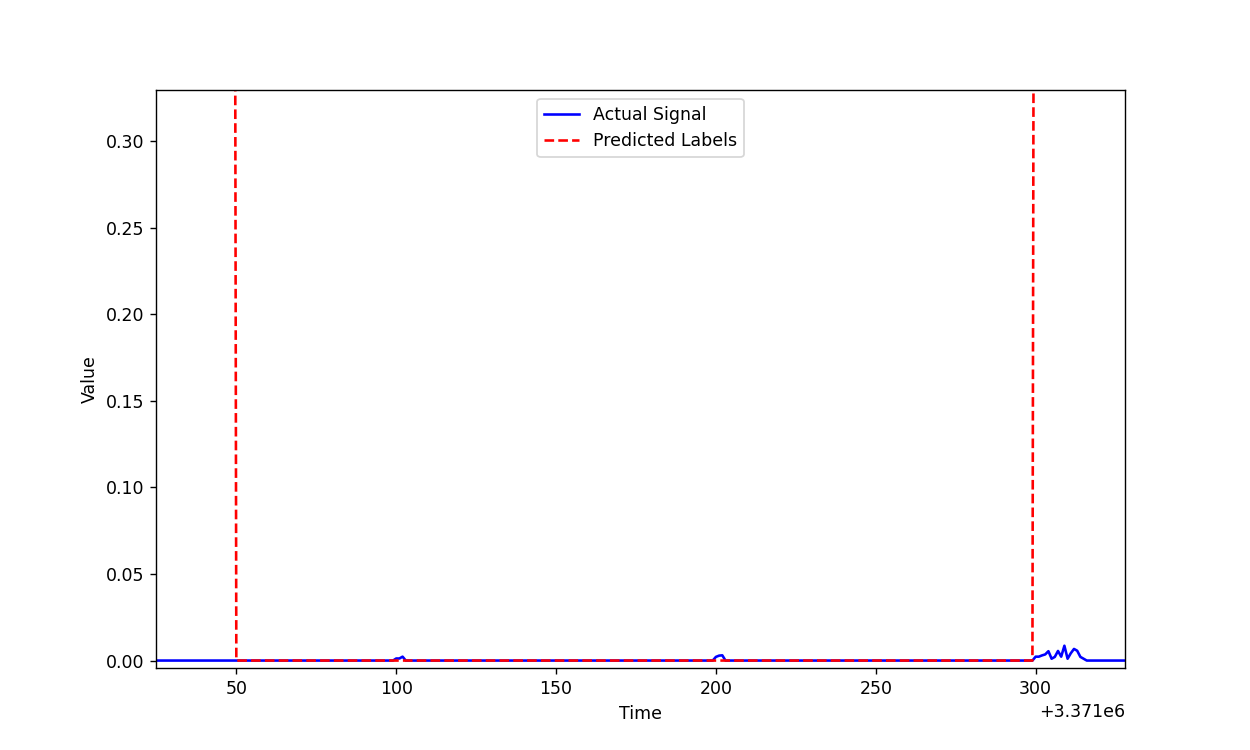

In [45]:
# This Plotting With Boxes Around Signals
plt.figure(figsize=(10,6))
plt.plot(df['Data'],label='Actual Signal',color='blue')
plt.plot(df['Label'],label='Predicted Labels',color='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [69]:
lists=[]
series=df['Data']

In [70]:
signal0=series.iloc[2817924:2817950]
signal0[len(signal0)] = "No-signal"
nosignal0=series.iloc[3367050:3367400]
nosignal0[len(nosignal0)] = "signal"
signal1=series.iloc[7986800:7986856]
signal1[len(signal1)] = "No-signal"
nosignal1=series.iloc[3367450:3367700]
nosignal1[len(nosignal1)] = "signal"
signal2=series.iloc[5329022:5329050]
signal2[len(signal2)] = "No-signal"
nosignal2=series.iloc[3367750:3368095]
nosignal2[len(nosignal2)] = "signal"
signal3=series.iloc[5329227:5329250]
signal3[len(signal3)] = "No-signal"
nosignal3=series.iloc[3366650:3366800]
nosignal3[len(nosignal3)] = "signal"
signal4=series.iloc[5337028:5337050]
signal4[len(signal4)] = "No-signal"
nosignal4=series.iloc[3368250:3368600]
nosignal4[len(nosignal4)] = "signal"
signal5=series.iloc[5199923:5199950]
signal5[len(signal5)] = "No-signal"
nosignal5=series.iloc[3368650:3368900]
nosignal5[len(nosignal5)] = "signal"
signal6=series.iloc[5200023:5200050]
signal6[len(signal6)] = "No-signal"
nosignal6=series.iloc[3369090:3369600]
nosignal6[len(nosignal6)] = "signal"
signal7=series.iloc[25222:25249]
signal7[len(signal7)] = "No-signal"
nosignal7=series.iloc[3370000:3370500]
nosignal7[len(nosignal7)] = "signal"
signal8=series.iloc[25322:25349 ]
signal8[len(signal8)] = "No-signal"
nosignal8=series.iloc[3370650:3370800]
nosignal8[len(nosignal8)] = "signal"
signal9=series.iloc[514023:514050 ]
signal9[len(signal9)] = "No-signal"
nosignal9=series.iloc[3371050:3371300]

In [71]:
data = {'signal': pd.concat([signal0,nosignal0, signal1,nosignal1, signal2,nosignal2, signal3,nosignal3, signal4,nosignal4, signal5,nosignal5, signal6,nosignal6, signal7,nosignal7, signal8,nosignal8, signal9,nosignal9], ignore_index=True)}
data_frame = pd.DataFrame(data)

In [72]:
data_frame.to_csv('10-SIGNAL-PEEKS.csv',index=False)

In [83]:
# file=pd.read_csv('10-SIGNAL-PEEKS.csv')
# file['Label']=1
# file.to_csv('10-SIGNAL.csv',index=False)

<IPython.core.display.Javascript object>


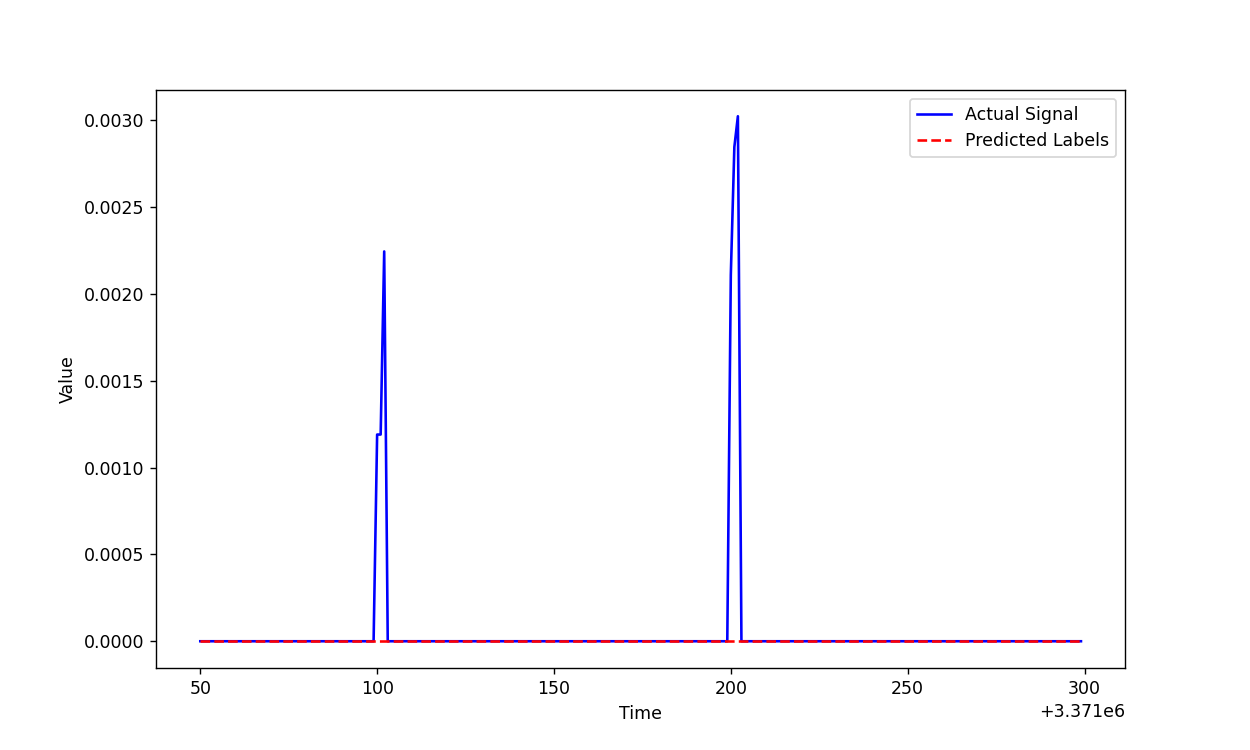

In [68]:
plt.figure(figsize=(10,6))
plt.plot(series.iloc[3371050:3371300],label='Actual Signal',color='blue')
plt.plot(df['Label'][3371050:3371300],label='Predicted Labels',color='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**Here Plotting Processed Labels on Un-Transformed Data**

In [134]:
unprocessed_data=pd.read_csv('new_96hrs_new_final_processed_data.csv')
unprocessed_data.head(5)

,Unnamed: 0,time,gsm,S1,S2,S3,dS1,dS2,dS3
0,0,2022-01-21 09:30:00.000000,5.075708e-07,-0.106049,-0.978210,0.182831,-0.000519,0.000000,-0.000488
1,1,2022-01-21 09:30:00.000000,1.252629e-06,-0.106567,-0.978210,0.182343,0.000000,0.000488,0.001007
2,2,2022-01-21 09:30:00.000000,1.222827e-06,-0.106567,-0.977722,0.183350,0.000519,0.000000,0.000977
3,3,2022-01-21 09:30:00.000000,3.488734e-06,-0.106049,-0.977722,0.184326,-0.001007,-0.000488,-0.001495
4,4,2022-01-21 09:30:00.000000,2.474524e-06,-0.107056,-0.978210,0.182831,-0.001495,0.000488,0.000000


In [135]:
graph_data=unprocessed_data['gsm']
time_series=unprocessed_data['time']

In [136]:
# extracting features
real_sequence=[]
temp=[]
events=[]
time=[]
time_temp=[]
for index,value in graph_data.items():
    if value!=0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]==0.0:
            real_sequence.append(temp)
            events.append(1)
            time_temp.append(time_series[(index+1)-len(temp)])
            time_temp.append(time_series[index])
            time.append(time_temp)
            time_temp=[]
            temp=[]
    if value==0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]!=0.0:
            real_sequence.append(temp)
            events.append(0)
            temp=[]

In [138]:
unprocessed_sequences=pad_sequences(real_sequence,padding='post',truncating='post',dtype=float,maxlen=50)

In [141]:
# Converting Predictions into DataFrame
dfs = []

# Loop through each list and its corresponding label
for list1, label in zip(unprocessed_sequences, predictions):#real_sequence
    # Repeat the label to match the length of the list
    label = np.repeat(label, len(list1))

    # Create a temporary DataFrame for the current list and label
    temp_df = pd.DataFrame({'Data': list1, 'Label': label})

    # Append the temporary DataFrame to the list
    dfs.append(temp_df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

<IPython.core.display.Javascript object>


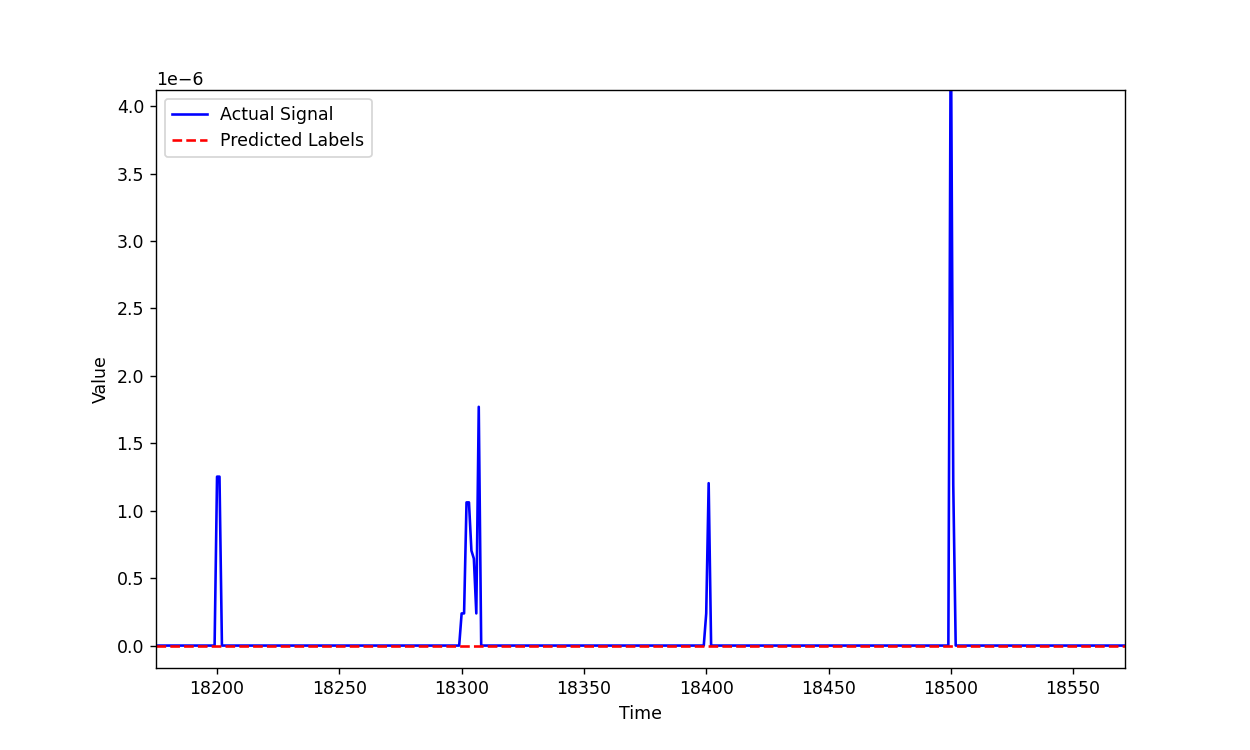

In [142]:
# This Plotting With Boxes Around Signals
plt.figure(figsize=(10,6))
plt.plot(df['Data'],label='Actual Signal',color='blue')
plt.plot(df['Label'],label='Predicted Labels',color='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**Accuracy on 10 min Data**

In [58]:
min_10_data=pd.read_csv('10_minutes_final_processed_gsmfloor_data5.csv')

In [59]:
min_10_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
min_10_data.shape

(59999, 3)

In [60]:
min_10_data['label']=min_10_data['label'].replace(2,1)

In [61]:
x_values=min_10_data['combined_result']
y_values=min_10_data['label']
time_series=min_10_data['t_dist']

In [62]:
event=[]
labe=[]
temp=[]
time=[]
time_temp=[]
for index,value in y_values.items():
    if value==1:
        temp.append(x_values[index])
        if (index+1)<len(y_values) and y_values[index+1]==0:
            event.append(temp)
            labe.append(1)
            time_temp.append(time_series[(index+1)-len(temp)])
            time_temp.append(time_series[index])
            time.append(time_temp)
            time_temp=[]
            temp=[]
    if value==0:
        temp.append(x_values[index])
        if (index+1)<len(y_values) and y_values[index+1]==1:
            event.append(temp)
            labe.append(0)
            temp=[]

In [63]:
# Not a sequence but label is 1 
zero_seq_label_one=[]
for position, sublist in enumerate(event):
    if all(element == 0 for element in sublist):
        if labe[position]==1:
            zero_seq_label_one.append(position)

In [64]:
# Replacing those with 0
for value in zero_seq_label_one:
    labe[value] = 0
# Is a sequence but label 0
seq_label_zero = []
for position, sublist in enumerate(event):
    if any(element != 0 for element in sublist):
        if labe[position] == 0:
            seq_label_zero.append(position)
# Replacing those with 1
for value in seq_label_zero:
    labe[value] = 1

In [65]:
event=pad_sequences(event,padding='post',truncating='post',dtype=float,maxlen=50)
labe=np.array(labe)
labe=labe.reshape(-1,1)
event=event.reshape(event.shape[0], event.shape[1], 1)

In [66]:
# Events
event_count=0
for i in labe:
    if i==1:
        event_count+=1
print(event_count)
# It is also verified From Heat Map

149


In [71]:
# Duration Calculation Of actual Events
duration=[]
for i in range(len(time)):
    duration.append(time[i][1]-time[i][0])

In [73]:
duration[1]

0.6099999999999999

In [41]:
# For 10 Min Data set
m_10=event.shape[0]
s0_10 = np.zeros((m_10, n_s))
c0_10 = np.zeros((m_10, n_s))

In [42]:
predictions_10=model.predict([event, s0_10, c0_10])
predictions_10=np.round(predictions_10)

10/10 [==============================] - 2s 9ms/step


In [43]:
# Get the confusion matrix
cm = confusion_matrix(labe, predictions_10)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}
classes=[0,1]
# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))

    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]

    # The accuracy for the current class is the ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [44]:
# Correct Way
print(per_class_accuracies)

{0: 0.9584775086505191, 1: 0.9584775086505191}


In [45]:
import seaborn as sn
confusion_mat=confusion_matrix(labe,predictions_10)

plt.figure(figsize=(10,7))
sn.heatmap(confusion_mat,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<IPython.core.display.Javascript object>

Text(95.72222222222221, 0.5, 'Truth')

In [53]:
report = classification_report(labe,predictions_10)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       140
           1       1.00      0.92      0.96       149

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289
